In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import seaborn


%matplotlib inline

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Load Data

In [38]:
user_ratings = pd.read_csv('lib/movie_training_data/user_ratedmovies_train.dat','\t')
# movie_actors = pandas.read_csv('lib/movie_training_data/movie_actors.dat','\t')
movie_countries = pd.read_csv('lib/movie_training_data/movie_countries.dat','\t')
# movie_directors = pandas.read_csv('lib/movie_training_data/movie_directors.dat','\t')
movie_genres = pd.read_csv('lib/movie_training_data/movie_genres.dat','\t')
# movie_locations = pandas.read_csv('lib/movie_training_data/movie_locations.dat','\t')
movie_tags = pd.read_csv('lib/movie_training_data/movie_tags.dat','\t')
# movies = pandas.read_csv('lib/movie_training_data/movies.dat','\t')
# tags = pandas.read_csv('lib/movie_training_data/tags.dat','\t')
# user_tagged_movies = pandas.read_csv('lib/movie_training_data/user_tagged_movies.dat','\t')
predictions = pd.read_csv('lib/predictions.dat', '\t')

In [3]:

 
# ur = pandas.read_csv('lib/movie_training_data/user_ratedmovies_train.dat','\t')
 
# plt.hist( ur['rating'] )
 
# create a test/train split
 
all_inds = np.random.permutation( range(0,len(user_ratings)) )
test_inds = all_inds[0:85000]
train_inds = all_inds[85000:len(user_ratings)]
 
user_ratings_test = user_ratings.iloc[ test_inds ]
user_ratings_train = user_ratings.iloc[ train_inds ]

#  Exploration

In [4]:
user_ratings_train.head()

,Unnamed: 0,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
122906,812061,68393,1281,3.0,17,11,2005,8,55,19
213446,777897,65293,1784,4.5,25,3,2004,7,0,36
132770,678129,55865,4901,3.0,27,2,2008,18,39,59
245163,695158,57512,2706,3.5,29,9,2005,22,31,5
118040,344248,28199,6238,4.0,29,10,2008,9,20,3


In [5]:
user_ratings_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685598 entries, 122906 to 749505
Data columns (total 10 columns):
Unnamed: 0     685598 non-null int64
userID         685598 non-null int64
movieID        685598 non-null int64
rating         685598 non-null float64
date_day       685598 non-null int64
date_month     685598 non-null int64
date_year      685598 non-null int64
date_hour      685598 non-null int64
date_minute    685598 non-null int64
date_second    685598 non-null int64
dtypes: float64(1), int64(9)
memory usage: 57.5 MB


In [6]:
user_ratings_train.describe()

,Unnamed: 0,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
count,685598.000000,685598.000000,685598.000000,685598.000000,685598.000000,685598.000000,685598.000000,685598.000000,685598.000000,685598.000000
mean,427976.898696,35205.473722,8705.133397,3.438336,15.565652,6.540820,2005.322730,12.130966,29.638622,29.503536
std,247029.940151,20388.543909,14437.661239,1.002415,8.952757,3.505207,2.282954,7.596043,17.273874,17.301642
min,0.000000,75.000000,1.000000,0.500000,1.000000,1.000000,1997.000000,0.000000,0.000000,0.000000
25%,213925.500000,18161.000000,1359.000000,3.000000,8.000000,4.000000,2004.000000,5.000000,15.000000,15.000000
50%,428057.500000,33880.000000,3249.000000,3.500000,15.000000,7.000000,2006.000000,13.000000,30.000000,30.000000
75%,642027.500000,52004.000000,6534.000000,4.000000,23.000000,10.000000,2007.000000,19.000000,45.000000,44.000000
max,855597.000000,71534.000000,65133.000000,5.000000,31.000000,12.000000,2009.000000,23.000000,59.000000,59.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222B08CACC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000222B19D6160>]], dtype=object)

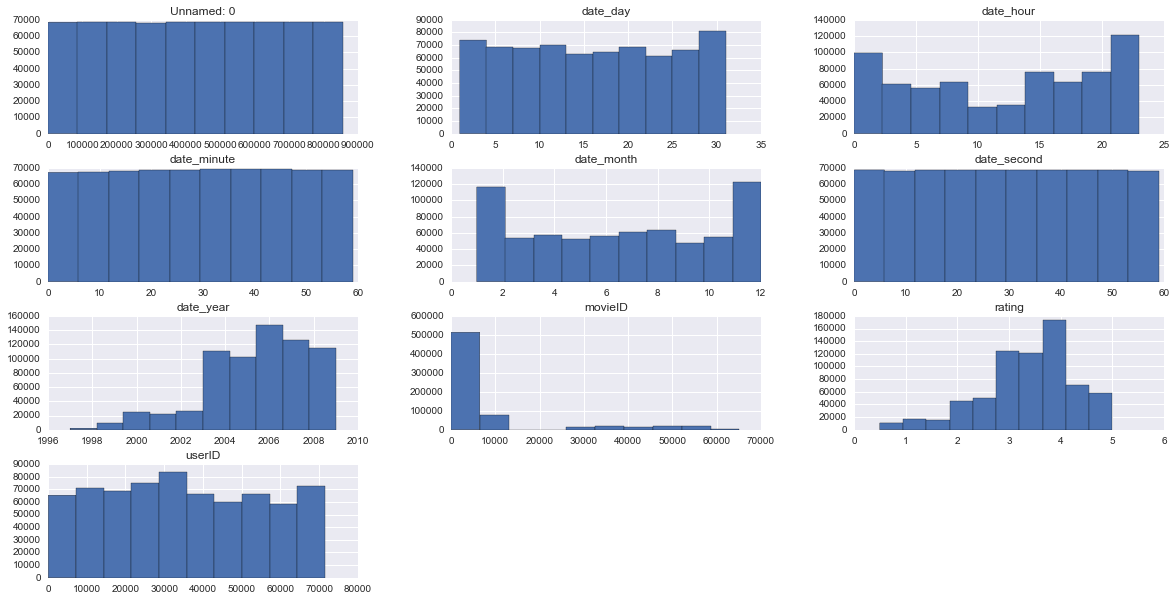

In [7]:
user_ratings_train.hist(figsize=(20,10))

In [8]:
movie_countries.head()

,movieID,country
0,1,USA
1,2,USA
2,3,USA
3,4,USA
4,5,USA


In [9]:
movie_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10197 entries, 0 to 10196
Data columns (total 2 columns):
movieID    10197 non-null int64
country    10189 non-null object
dtypes: int64(1), object(1)
memory usage: 239.0+ KB


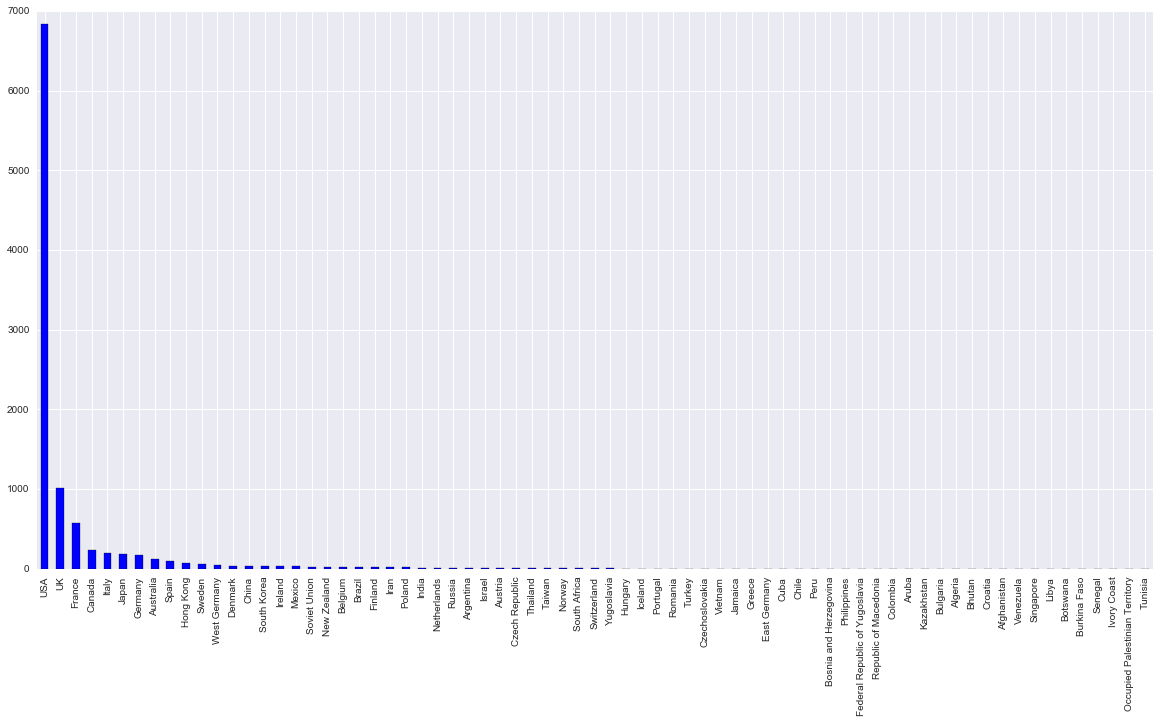

In [10]:
movie_countries.country.value_counts().plot(kind='bar', figsize=(20,10))

In [11]:
movie_genres.head()

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [12]:
movie_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20809 entries, 0 to 20808
Data columns (total 2 columns):
movieID    20809 non-null int64
genre      20809 non-null object
dtypes: int64(1), object(1)
memory usage: 487.7+ KB


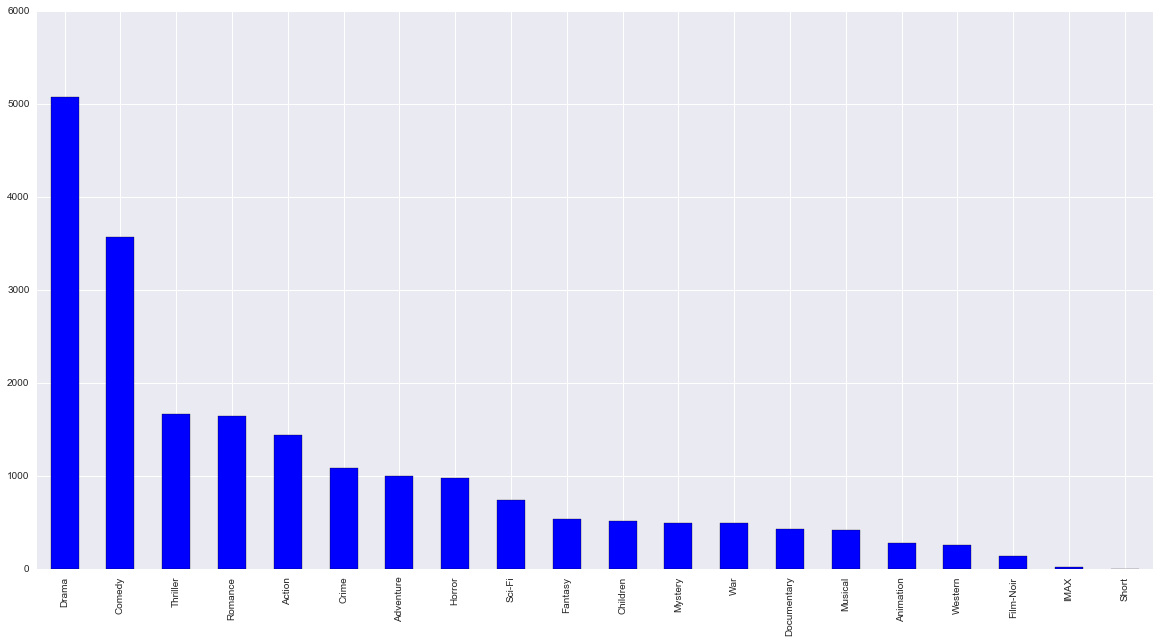

In [13]:
movie_genres.genre.value_counts().plot(kind='bar', figsize=(20,10))

In [14]:
movie_tags.head()

,movieID,tagID,tagWeight
0,1,7,1
1,1,13,3
2,1,25,3
3,1,55,3
4,1,60,1


In [15]:
movie_tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51795 entries, 0 to 51794
Data columns (total 3 columns):
movieID      51795 non-null int64
tagID        51795 non-null int64
tagWeight    51795 non-null int64
dtypes: int64(3)
memory usage: 1.6 MB


In [16]:
movie_tags.describe()

,movieID,tagID,tagWeight
count,51795.000000,51795.000000,51795.000000
mean,12163.180307,4354.541307,1.381156
std,17135.997212,4157.625119,1.279396
min,1.000000,1.000000,1.000000
25%,1861.000000,775.000000,1.000000
50%,4399.000000,2738.000000,1.000000
75%,8494.000000,6800.000000,1.000000
max,65130.000000,16518.000000,42.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222B26F8240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000222B28457F0>]], dtype=object)

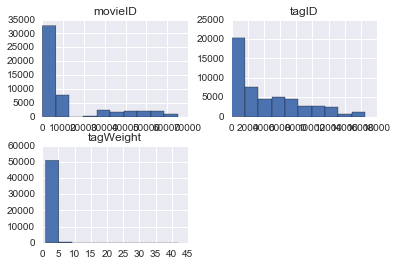

In [17]:
movie_tags.hist()

# Cleaning
I'll use movie genre, movie country, and user ratings with KNN to predict unknown ratings, movie tags seem less helpful

In [18]:
user_ratings_train.head(1)

,Unnamed: 0,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
122906,812061,68393,1281,3,17,11,2005,8,55,19


In [19]:
movie_countries.head(1)


,movieID,country
0,1,USA


In [20]:
movie_genres.head(1)

,movieID,genre
0,1,Adventure


In [21]:
combined_user_ratings_meta = pd.merge(
                                    pd.merge(user_ratings_train, movie_countries, on='movieID', how='inner')  
                                      , movie_genres, on='movieID', how='inner')

In [22]:
combined_user_ratings_meta.head(2)

,Unnamed: 0,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second,country,genre
0,812061,68393,1281,3,17,11,2005,8,55,19,USA,Comedy
1,812061,68393,1281,3,17,11,2005,8,55,19,USA,Drama


In [23]:
combined_user_ratings_meta['country'] = combined_user_ratings_meta['country'].astype('category')
combined_user_ratings_meta['genre'] = combined_user_ratings_meta['genre'].astype('category')
combined_user_ratings_meta['country'] = combined_user_ratings_meta['country'].cat.codes
combined_user_ratings_meta['genre'] = combined_user_ratings_meta['genre'].cat.codes

In [24]:
combined_user_ratings_meta.head()

,Unnamed: 0,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second,country,genre
0,812061,68393,1281,3.0,17,11,2005,8,55,19,66,4
1,812061,68393,1281,3.0,17,11,2005,8,55,19,66,7
2,812061,68393,1281,3.0,17,11,2005,8,55,19,66,18
3,299912,24668,1281,4.5,9,2,2007,11,10,51,66,4
4,299912,24668,1281,4.5,9,2,2007,11,10,51,66,7


In [25]:
#  remove Unamed and second as I can't see how they would have any relevance
combined_user_ratings_meta = combined_user_ratings_meta.loc[:,['userID','movieID','rating','date_day','date_month','date_year','date_hour'
                                  ,'date_minute', 'country', 'genre']]
combined_user_ratings_meta.head(2)

,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,country,genre
0,68393,1281,3,17,11,2005,8,55,66,4
1,68393,1281,3,17,11,2005,8,55,66,7


### Clean the test set in the same way

In [26]:
combined_user_ratings_meta_test = pd.merge(
                                    pd.merge(user_ratings_test, movie_countries, on='movieID', how='inner')  
                                      , movie_genres, on='movieID', how='inner')

combined_user_ratings_meta_test['country'] = combined_user_ratings_meta_test['country'].astype('category')
combined_user_ratings_meta_test['genre'] = combined_user_ratings_meta_test['genre'].astype('category')
combined_user_ratings_meta_test['country'] = combined_user_ratings_meta_test['country'].cat.codes
combined_user_ratings_meta_test['genre'] = combined_user_ratings_meta_test['genre'].cat.codes

combined_user_ratings_meta_test = combined_user_ratings_meta_test.loc[:,['userID','movieID','rating','date_day',
                                    'date_month','date_year','date_hour','date_minute', 'country', 'genre']]

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(combined_user_ratings_meta.loc[:,['userID','movieID','date_day','date_month','date_year','date_hour'
                                  ,'date_minute', 'country', 'genre']].as_matrix(), 
                                            np.asarray(combined_user_ratings_meta.loc[:,['rating']]))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [31]:
knn.score(combined_user_ratings_meta_test.loc[:,['userID','movieID','date_day','date_month','date_year','date_hour'
                                  ,'date_minute', 'country', 'genre']].as_matrix(), 
                                            np.asarray(combined_user_ratings_meta_test.loc[:,['rating']]))

-0.22527425904398757

In [32]:
predicted_ratings = []
for user in combined_user_ratings_meta_test.loc[:,['userID','movieID','date_day','date_month','date_year','date_hour'
                                  ,'date_minute', 'country', 'genre']].as_matrix():
    predicted_ratings.append(knn.predict(user.reshape(1,-1)))

In [33]:
actual_ratings = np.asarray(combined_user_ratings_meta_test.loc[:,['rating']])

In [34]:
actual_ratings

array([[ 3.5],
       [ 3.5],
       [ 3.5],
       ..., 
       [ 3.5],
       [ 3.5],
       [ 1. ]])

In [36]:
predicted_ratings = np.asarray(predicted_ratings)
predicted_ratings

array([[[ 3.2]],

       [[ 3.2]],

       [[ 3.2]],

       ..., 
       [[ 2. ]],

       [[ 2. ]],

       [[ 2.6]]])

In [37]:
#  calculate rmse
rmse = 0.0
for i in range(len(actual_ratings)):
    rmse += (predicted_ratings[i][0] - actual_ratings[i])**2
    
rmse /= len(actual_ratings)
rmse = np.sqrt(rmse)
rmse

array([ 1.10081592])

# Create Predictions for Kaggle

In [39]:
predictions.head()

,testID,userID,movieID
0,0,6785,2599
1,1,10783,339
2,2,64642,58162
3,3,6971,296
4,4,48802,1387


In [45]:
combined_user_ratings_meta_kaggle = pd.merge(
                                    pd.merge(predictions, movie_countries, on='movieID', how='inner')  
                                      , movie_genres, on='movieID', how='inner')

combined_user_ratings_meta_kaggle['country'] = combined_user_ratings_meta_kaggle['country'].astype('category')
combined_user_ratings_meta_kaggle['genre'] = combined_user_ratings_meta_kaggle['genre'].astype('category')
combined_user_ratings_meta_kaggle['country'] = combined_user_ratings_meta_kaggle['country'].cat.codes
combined_user_ratings_meta_kaggle['genre'] = combined_user_ratings_meta_kaggle['genre'].cat.codes

combined_user_ratings_meta_kaggle = combined_user_ratings_meta_kaggle.loc[:,['userID','movieID','rating','date_day',
                                    'date_month','date_year','date_hour','date_minute', 'country', 'genre']]

In [56]:
combined_user_ratings_meta_kaggle['date_day'] = [combined_user_ratings_meta['date_day'].mean()] * combined_user_ratings_meta_kaggle.shape[0]
combined_user_ratings_meta_kaggle['date_month'] = [combined_user_ratings_meta['date_month'].mean()] * combined_user_ratings_meta_kaggle.shape[0]
combined_user_ratings_meta_kaggle['date_year'] = [combined_user_ratings_meta['date_year'].mean()] * combined_user_ratings_meta_kaggle.shape[0]
combined_user_ratings_meta_kaggle['date_hour'] = [combined_user_ratings_meta['date_hour'].mean()] * combined_user_ratings_meta_kaggle.shape[0]
combined_user_ratings_meta_kaggle['date_minute'] = [combined_user_ratings_meta['date_minute'].mean()] * combined_user_ratings_meta_kaggle.shape[0]

In [57]:
predicted_ratings_kaggle = []
for user in combined_user_ratings_meta_kaggle.loc[:,['userID','movieID','date_day','date_month','date_year','date_hour'
                                  ,'date_minute', 'country', 'genre']].as_matrix():
    predicted_ratings_kaggle.append(knn.predict(user.reshape(1,-1)))

In [64]:
combined_user_ratings_meta_kaggle_predictions = pd.merge(
                                    pd.merge(predictions, movie_countries, on='movieID', how='inner')  
                                      , movie_genres, on='movieID', how='inner')

In [69]:
pd.DataFrame({'testID':combined_user_ratings_meta_kaggle_predictions.loc[:,'testID'] ,'predicted rating':predicted_ratings_kaggle})\
                        .to_csv('predictions_output')

In [66]:
combined_user_ratings_meta_kaggle_predictions.head()

,testID,userID,movieID,country,genre
0,0,6785,2599,USA,Comedy
1,4452,56091,2599,USA,Comedy
2,4487,36292,2599,USA,Comedy
3,4971,31682,2599,USA,Comedy
4,5480,44287,2599,USA,Comedy
